# Practical No 8: Implement the Jaccard and Adamic-Adar measures for link prediction.

# Jaccard Similarity

Jaccard similarity is a statistical measure used to compare the similarity between two sets. In the context of networks, it measures the similarity between two nodes based on their shared neighbors.

Formula:

`Jaccard(A, B) = |A ∩ B| / |A ∪ B|`

Where:

* A and B are two sets (e.g., sets of neighbors for two nodes).
* |A ∩ B| is the cardinality of the intersection of A and B (number of common elements).
* |A ∪ B| is the cardinality of the union of A and B (total number of unique elements).

A higher Jaccard similarity indicates a stronger relationship between the two nodes.

# Adamic-Adar Index

The Adamic-Adar index is another similarity measure used in network analysis, particularly for link prediction. It assigns higher weights to shared neighbors that are less common, suggesting that they are more influential in connecting the two nodes.

Formula:

`Adamic-Adar(A, B) = Σ(1 / log(degree(N)))`

Where:

* N is a common neighbor of nodes A and B.
* degree(N) is the degree of node N (number of neighbors).

A higher Adamic-Adar index indicates a stronger potential connection between the two nodes.

In [ ]:
import networkx as nx
import math

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

In [ ]:
import matplotlib.pyplot as plt

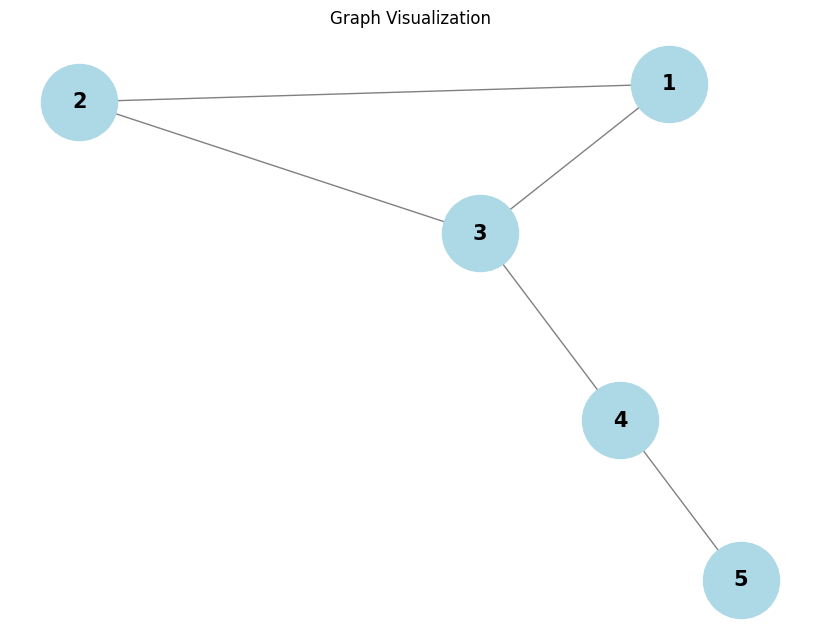

In [ ]:
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=3000, font_size=15, font_weight='bold', edge_color='gray')
plt.title("Graph Visualization")
plt.show()

In [ ]:
def jaccard_index(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    intersection = len(neighbors1 & neighbors2)
    union = len(neighbors1 | neighbors2)
    return intersection / union if union != 0 else 0

In [ ]:
print("Jaccard Index between nodes 1 and 4:", jaccard_index(G, 1, 4))

Jaccard Index between nodes 1 and 4: 0.3333333333333333


In [ ]:
def adamic_adar_index(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    common_neighbors = neighbors1 & neighbors2
    score = 0
    for neighbor in common_neighbors:
        degree = len(list(G.neighbors(neighbor)))
        score += 1 / math.log(degree) if degree > 1 else 0
    return score

In [ ]:
print("Adamic-Adar Index between nodes 1 and 4:", adamic_adar_index(G, 1, 4))

Adamic-Adar Index between nodes 1 and 4: 0.9102392266268373


# Analysis

* Jaccard Index (0.3333): This measures the similarity between nodes 1 and 4 by comparing their shared neighbors to all possible neighbors. The result (33.33%) indicates a moderate similarity based on shared connections.

* Adamic-Adar Index (0.9102): This index gives more weight to rare common neighbors. Since node 3 (the common neighbor of 1 and 4) has a relatively low degree, it results in a higher score (91.02%), suggesting a stronger potential for a link between nodes 1 and 4.

# Conclusion

In this practical, the Jaccard Index and Adamic-Adar Index are used to measure the similarity between nodes based on shared neighbors, with the Adamic-Adar Index giving more weight to rare common neighbors. The results indicate a moderate to high potential for a link between nodes 1 and 4, with Adamic-Adar suggesting a stronger likelihood.